## Transfer Learning VGG 16 and VGG 19 using Keras

Please download the dataset from the below url

In [19]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [20]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'


In [ ]:
# Import the resnet50 library as shown below and add preprocessing layer to the front of Resnet50
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [22]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [23]:
  # useful for getting number of output classes
folders = glob('Datasets/train/*')

In [24]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [25]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [26]:

# view the structure of the model
model.summary()


Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [27]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [28]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [29]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 64 images belonging to 3 classes.


In [30]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 58 images belonging to 3 classes.


In [31]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\RAJ\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
2/2 [==============================] - 12s 8s/step - loss: 3.8354 - accuracy: 0.3438 - val_loss: 13.3477 - val_accuracy: 0.3276
Epoch 2/50
2/2 [==============================] - 15s 11s/step - loss: 14.7298 - accuracy: 0.3906 - val_loss: 6.7139 - val_accuracy: 0.3276
Epoch 3/50
2/2 [==============================] - 14s 10s/step - loss: 6.4035 - accuracy: 0.3438 - val_loss: 2.5975 - val_accuracy: 0.5172
Epoch 4/50
2/2 [==============================] - 15s 11s/step - loss: 4.5518 - accuracy: 0.4062 - val_loss: 6.6510 - val_accuracy: 0.1552
Epoch 5/50
2/2 [==============================] - 14s 9s/step - loss: 4.4344 - accuracy: 0.4375 - val_loss: 2.6392 - val_accuracy: 0.5172
Epoch 6/50
2/2 [==============================] - 14s 10s/step - loss: 2.5544 - accuracy: 0.4688 - val_loss: 3.3582 - val_accuracy: 0.3276
Epoch 7/50
2/2 [==============================] - 14s 10s/step - loss: 3.5394 - accuracy: 0.3906 - val_loss: 2.3435 - val_accuracy: 0.3276
Epoch 8/50
2/2 [===========

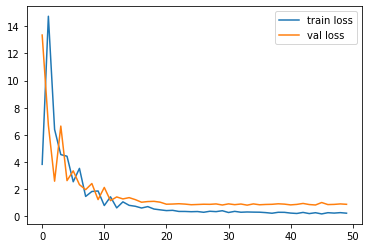

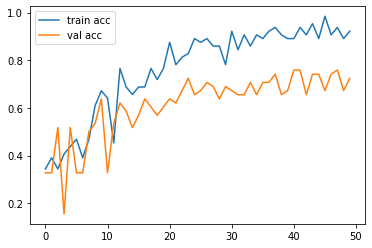

<Figure size 432x288 with 0 Axes>

In [32]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [33]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

C:\Users\RAJ\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [34]:

y_pred = model.predict(test_set)


In [35]:
y_pred

array([[4.70828731e-03, 9.79998410e-01, 1.52932769e-02],
       [2.50725359e-01, 4.29686248e-01, 3.19588363e-01],
       [1.62892453e-02, 3.74922156e-01, 6.08788610e-01],
       [3.78622562e-02, 9.40075636e-01, 2.20620278e-02],
       [1.68261021e-01, 1.10826083e-01, 7.20912874e-01],
       [4.87333715e-01, 4.43143435e-02, 4.68351930e-01],
       [9.17080194e-02, 5.40479124e-01, 3.67812783e-01],
       [1.07587734e-02, 3.87378997e-04, 9.88853812e-01],
       [1.24496873e-02, 4.52283084e-01, 5.35267293e-01],
       [1.02206292e-02, 8.34851205e-01, 1.54928178e-01],
       [2.24686824e-02, 1.61352798e-01, 8.16178560e-01],
       [5.02072624e-04, 7.85072744e-01, 2.14425206e-01],
       [1.45933473e-06, 9.66372550e-04, 9.99032140e-01],
       [1.73656596e-03, 4.33778763e-02, 9.54885483e-01],
       [7.54775777e-02, 4.79368150e-01, 4.45154250e-01],
       [2.09887582e-03, 4.65924948e-01, 5.31976163e-01],
       [3.56388395e-03, 2.34159362e-03, 9.94094551e-01],
       [7.63562461e-03, 7.67188

In [36]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [37]:
y_pred

array([1, 1, 2, 1, 2, 0, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 0, 2, 1,
       2, 0, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 0, 2, 2, 1, 1, 1, 2, 2, 0, 1,
       1, 2, 1, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [38]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [39]:
model=load_model('model_resnet50.h5')

In [47]:
img=image.load_img('Datasets/Test/lamborghini/11.jpg',target_size=(224,224))



In [48]:
x=image.img_to_array(img)
x

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [196., 187., 172.],
        [217., 208., 193.],
        [243., 234., 219.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 245., 237.],
        [243., 243., 235.],
        [242., 242., 234.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [240., 249., 248.],
        [242., 251., 250.],
        [242., 251., 250.]],

       ...,

       [[189., 207., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 206., 227.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 2

In [49]:
x.shape

(224, 224, 3)

In [50]:
x=x/255

In [51]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [52]:
model.predict(img_data)

array([[0.00109631, 0.00234278, 0.9965609 ]], dtype=float32)

In [53]:
a=np.argmax(model.predict(img_data), axis=1)

In [54]:
a==1

array([False])